Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

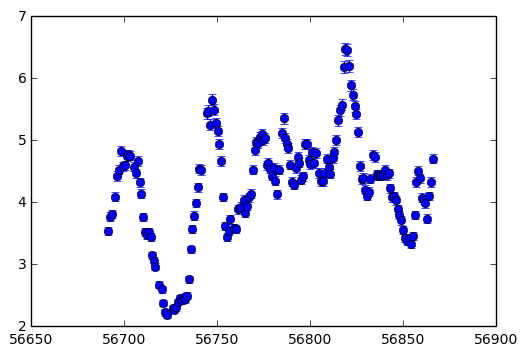

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

ref_file="lc/1367A.lc"
echo_file="lc/3465A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.337e-01 6.112e+01 inf -- -4.041e+02 -- 1 1 1 1 1 1 1
   2 7.647e-01 6.015e+01 6.901e+01 -- -3.351e+02 -- 0.65784 0.58285 0.5699 0.567505 0.56704 0.566344 0.573791
   3 3.242e+00 5.939e+01 6.602e+01 -- -2.691e+02 -- 0.42512 0.198095 0.146253 0.137492 0.135449 0.133237 0.150987
   4 1.563e+00 5.894e+01 6.233e+01 -- -2.067e+02 -- 0.328446 -0.100568 -0.261985 -0.286046 -0.293214 -0.298752 -0.270142
   5 6.151e-01 5.858e+01 5.845e+01 -- -1.483e+02 -- 0.300114 -0.231637 -0.637422 -0.692493 -0.715789 -0.728243 -0.692465
   6 3.834e-01 5.758e+01 5.397e+01 -- -9.432e+01 -- 0.288119 -0.218711 -0.948517 -1.05695 -1.12601 -1.152 -1.11841
   7 2.764e-01 5.488e+01 4.687e+01 -- -4.745e+01 -- 0.288807 -0.20359 -1.129 -1.33421 -1.50858 -1.56203 -1.54725
   8 2.123e-01 4.884e+01 3.703e+01 -- -1.042e+01 -- 0.290741 -0.199424 -1.16697 -1.47951 -1.82761 -1.93862 -1.97495
   9 1.660e-01 3.761e+01 2.500e+01 -- 1.458e+01 -- 0.297078 -0.192793 -1.17471 -1.51254 -2.03046 -2.24008 -2.39415
  10 1.251e-01 

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.481e+01 3.004e-01 5.393e-01 0.89 +++
+++ 3.525e+01 3.432e+01 3.004e-01 6.588e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.004e-01 5.990e-01 1.34 +++
+++ 3.525e+01 3.470e+01 3.004e-01 5.692e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.004e-01 5.543e-01 0.996 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.782e-01 2.426e-02 0.974 +++
+++ 3.525e+01 3.422e+01 -1.782e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.782e-01 7.486e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.782e-01 4.956e-02 1.21 +++
+++ 3.525e+01 3.471e+01 -1.782e-01 3.691e-02 1.09 +++
+++ 3.525e+01 3.474e+01 -1.782e-01 3.058e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.782e-01 2.742e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.075e+00 0.275 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.597 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.873e-01 0.798 +++
+++ 3.525e+01 3.480e+01 -1.191e+00 -9.727e-01 0.909 +++
+++ 3.525e+01 3.477e+01 -1.191e+00 -9.655e-01 0.

<Container object of 3 artists>

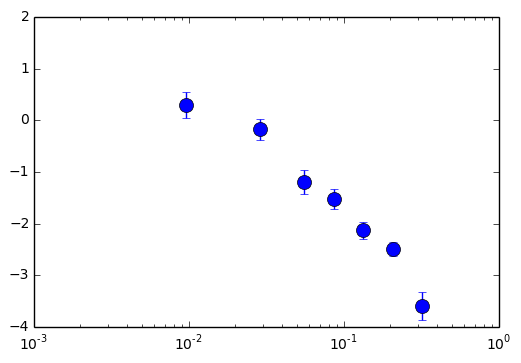

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10)


<Container object of 3 artists>

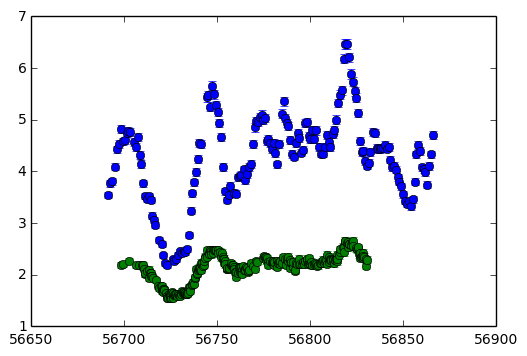

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')
errorbar(t2, l2, yerr=l2e, fmt='o')

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.360e-01 4.662e+01 inf -- -2.840e+01 -- 1 1 1 1 1 1 1
   2 7.723e-01 4.603e+01 5.319e+01 -- 2.478e+01 -- 0.595569 0.573902 0.564885 0.564933 0.564693 0.564817 0.564018
   3 3.411e+00 4.536e+01 5.196e+01 -- 7.675e+01 -- 0.241284 0.160851 0.128635 0.129632 0.129254 0.129464 0.128634
   4 1.484e+01 4.466e+01 5.009e+01 -- 1.268e+02 -- -0.00703234 -0.219623 -0.310096 -0.306017 -0.306362 -0.306197 -0.306021
   5 5.921e-01 4.382e+01 4.797e+01 -- 1.748e+02 -- -0.111363 -0.525952 -0.75296 -0.741885 -0.742361 -0.742634 -0.74129
   6 3.733e-01 4.246e+01 4.584e+01 -- 2.207e+02 -- -0.140827 -0.700007 -1.19878 -1.1757 -1.17861 -1.18043 -1.17869
   7 2.744e-01 4.002e+01 4.318e+01 -- 2.638e+02 -- -0.163132 -0.756421 -1.63306 -1.59991 -1.61462 -1.6204 -1.61864
   8 2.214e-01 3.558e+01 3.862e+01 -- 3.024e+02 -- -0.180826 -0.786047 -2.01272 -1.99632 -2.05034 -2.06438 -2.06287
   9 1.964e-01 2.792e+01 3.104e+01 -- 3.335e+02 -- -0.198109 -0.808078 -2.25955 -2.32516 -2.48547 -2.51643 -2.51957
  10 2.0

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 3.677e+02 3.672e+02 -2.297e-01 3.897e-02 0.967 +++
+++ 3.677e+02 3.667e+02 -2.297e-01 1.733e-01 2.01 +++
+++ 3.677e+02 3.670e+02 -2.297e-01 1.061e-01 1.45 +++
+++ 3.677e+02 3.671e+02 -2.297e-01 7.255e-02 1.2 +++
+++ 3.677e+02 3.672e+02 -2.297e-01 5.576e-02 1.08 +++
+++ 3.677e+02 3.672e+02 -2.297e-01 4.736e-02 1.02 +++
+++ 3.677e+02 3.672e+02 -2.297e-01 4.316e-02 0.995 +++
	### errors for param 1 ###
+++ 3.677e+02 3.672e+02 -8.176e-01 -5.886e-01 0.936 +++
+++ 3.677e+02 3.667e+02 -8.176e-01 -4.741e-01 1.97 +++
+++ 3.677e+02 3.670e+02 -8.176e-01 -5.314e-01 1.41 +++
+++ 3.677e+02 3.671e+02 -8.176e-01 -5.600e-01 1.16 +++
+++ 3.677e+02 3.672e+02 -8.176e-01 -5.743e-01 1.05 +++
+++ 3.677e+02 3.672e+02 -8.176e-01 -5.815e-01 0.991 +++
	### errors for param 2 ###
+++ 3.677e+02 3.675e+02 -2.365e+00 -2.190e+00 0.303 +++
+++ 3.677e+02 3.674e+02 -2.365e+00 -2.103e+00 0.671 +++
+++ 3.677e+02 3.672e+02 -2.365e+00 -2.059e+00 0.905 +++
+++ 3.677e+02 3.672e+02 -2.365e+00 -2

<Container object of 3 artists>

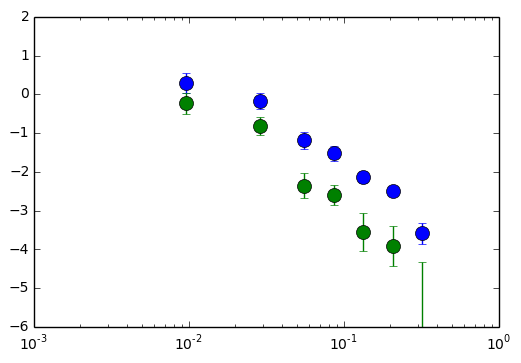

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10)
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10)

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 6.628e+02 9.007e+00 inf -- 4.160e+02 -- -0.264643 -0.797908 -2.07791 -2.35822 -3.1415 -3.50338 -6.09489 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 6.842e+02 1.078e+01 2.116e+00 -- 4.181e+02 -- -0.226169 -0.759199 -2.03908 -2.32032 -3.11387 -3.43598 -6.39489 0.0502949 0.152916 0.212494 0.121125 0.216976 0.336684 -0.244596
   5 1.559e+02 1.270e+01 1.915e+00 -- 4.201e+02 -- -0.193741 -0.726441 -2.00316 -2.28893 -3.08464 -3.36731 -6.69489 0.0145685 0.191324 0.293499 0.136888 0.312024 0.482796 1.86942
   7 1.618e+03 1.477e+01 1.743e+00 -- 4.218e+02 -- -0.166298 -0.698635 -1.97153 -2.26256 -3.05584 -3.30885 -6.99489 -0.0118999 0.220073 0.352843 0.149084 0.389017 0.574531 -0.403772
   9 2.935e+02 1.701e+01 1.600e+00 -- 4.234e+02 -- -0.142929 -0.674898 -1.94419 -2.24018 -3.02852 -3.26097 -7.29489 -0.0319925 0.242138 0.397314 0.158774 0.451737 0.636061 -2.89416
  11 9.523e+02 1.944e+01 1.478e+00 -- 4.249e+02 -- -0.122901 -0.654512 -1.92069 -2.22102 -3.00314 -3.22181 -6.99489 -0.0475429 0.25942 0.431

In [11]:
p, pe = clag.errors(Cx, p, pe)

	### errors for param 0 ###
+++ 4.441e+02 4.440e+02 2.894e-02 3.139e-02 0.184 +++
+++ 4.441e+02 4.439e+02 2.894e-02 3.262e-02 0.538 +++
+++ 4.441e+02 4.437e+02 2.894e-02 3.323e-02 0.868 +++
+++ 4.441e+02 4.436e+02 2.894e-02 3.354e-02 1.1 +++
+++ 4.441e+02 4.436e+02 2.894e-02 3.339e-02 0.977 +++
+++ 4.441e+02 4.436e+02 2.894e-02 3.346e-02 1.04 +++
+++ 4.441e+02 4.436e+02 2.894e-02 3.342e-02 1.01 +++
	### errors for param 1 ###
+++ 4.441e+02 4.440e+02 -5.016e-01 -5.000e-01 0.272 +++
+++ 4.441e+02 4.437e+02 -5.016e-01 -4.993e-01 0.765 +++
+++ 4.441e+02 4.435e+02 -5.016e-01 -4.989e-01 1.18 +++
+++ 4.441e+02 4.437e+02 -5.016e-01 -4.991e-01 0.954 +++
+++ 4.441e+02 4.436e+02 -5.016e-01 -4.990e-01 1.06 +++
+++ 4.441e+02 4.436e+02 -5.016e-01 -4.990e-01 1.01 +++
	### errors for param 2 ###
+++ 4.441e+02 4.439e+02 -1.763e+00 -1.754e+00 0.496 +++
+++ 4.441e+02 4.433e+02 -1.763e+00 -1.750e+00 1.76 +++
+++ 4.441e+02 4.437e+02 -1.763e+00 -1.752e+00 0.96 +++
+++ 4.441e+02 4.435e+02 -1.763e+00 -1.751e+

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

<Container object of 3 artists>

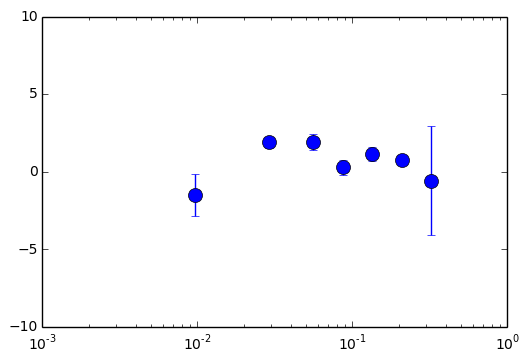

In [13]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10)



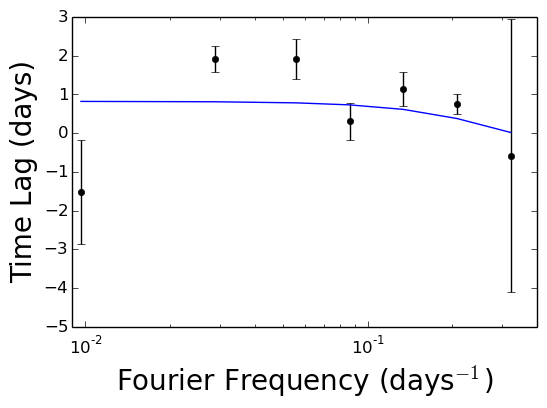

In [17]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.4)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)

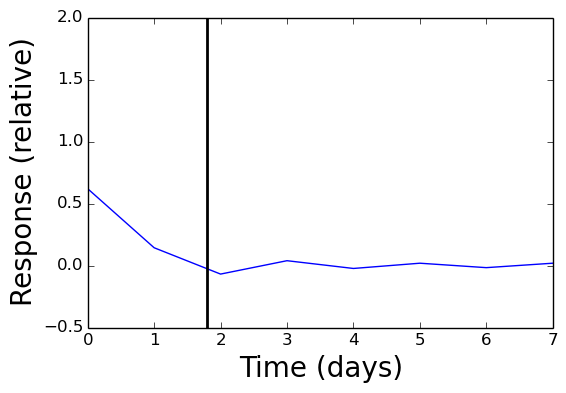

In [18]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([1.80,1.80], [-50, 50], color='k', linestyle='-', linewidth=2)